Preprocessing sul dataset Titanic per la Kaggle challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_data = pd.read_csv('../data/titanic/train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

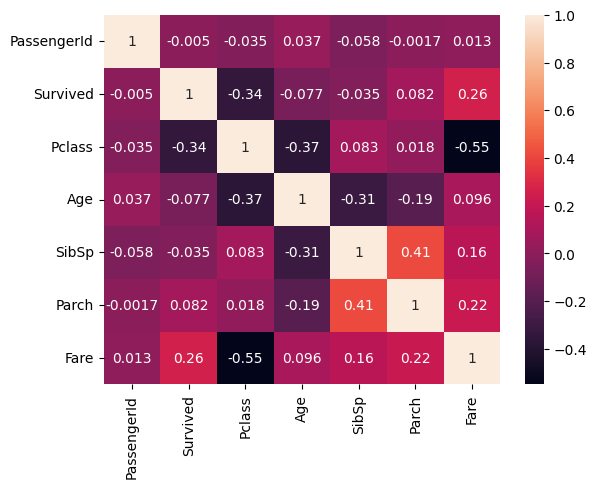

In [6]:
sns.heatmap(titanic_data.corr(numeric_only=True), annot=True)

Divido il training dataset in train / test, in modo che i dati abbiamo distribuzione simile

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit (n_splits=1, test_size=0.2)

for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

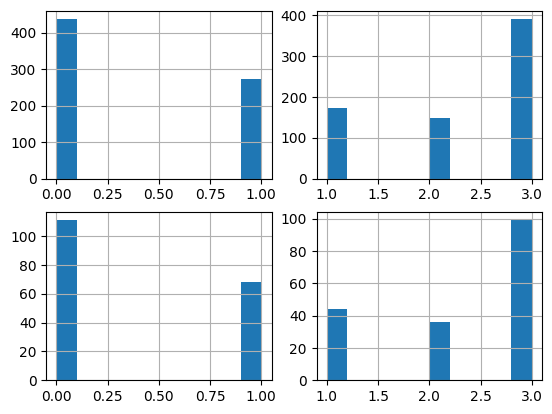

In [8]:
plt.subplot(2,2,1)
strat_train_set['Survived'].hist()

plt.subplot(2,2,2)
strat_train_set['Pclass'].hist()

plt.subplot(2,2,3)
strat_test_set['Survived'].hist()

plt.subplot(2,2,4)
strat_test_set['Pclass'].hist()

plt.show()

Noto che train e test hanno la stessa distribuzione

In [9]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 179 to 209
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        162 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None) :
        return self
    def transform(self, X) :
        imputer = SimpleImputer (strategy="mean")
        X['Age'] = imputer.fit_transform (X[['Age']])
        return X

In [11]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        column_names = ["C", "S", "Q", "N"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names = ["Female", "Male"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        return X

In [12]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(columns=['Embarked', 'Ticket', 'Name', 'Sex', 'Cabin', 'N'], axis=1, errors='ignore')


In [13]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('ageimputer', AgeImputer()),
                     ('featureencoder', FeatureEncoder())]) #, 'featuredropper', FeatureDropper()

In [14]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [19]:
strat_train_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
179,180,0,3,36.0,0,0,0.0000,0.0,0.0,1.0,0.0,1.0
138,139,0,3,16.0,0,0,9.2167,0.0,0.0,1.0,0.0,1.0
307,308,1,1,17.0,1,0,108.9000,1.0,0.0,0.0,1.0,0.0
705,706,0,2,39.0,0,0,26.0000,0.0,0.0,1.0,0.0,1.0
429,430,1,3,32.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [20]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 179 to 209
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [16]:
strat_train_set.drop(columns=['Embarked', 'Ticket', 'Name', 'Sex', 'Cabin', 'N'], axis=1, errors='ignore', inplace=True)

In [17]:
from sklearn.preprocessing import StandardScaler

X_train = strat_train_set.drop(columns=['Survived'], axis=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 

In [18]:
X_train

array([[-1.03630605,  0.82789342,  0.55269726, ...,  0.61197825,
        -0.73561236,  0.73561236],
       [-1.19517011,  0.82789342, -1.02012135, ...,  0.61197825,
        -0.73561236,  0.73561236],
       [-0.54034023, -1.56828591, -0.94148042, ..., -1.63404501,
         1.35941164, -1.35941164],
       ...,
       [-0.39310037, -0.37019624, -0.39099391, ...,  0.61197825,
         1.35941164, -1.35941164],
       [ 1.49776934,  0.82789342, -0.46963484, ...,  0.61197825,
        -0.73561236,  0.73561236],
       [-0.92006406, -1.56828591,  0.86726098, ..., -1.63404501,
        -0.73561236,  0.73561236]])